In [36]:
from src.models.lightningmodel import LightningClassifierModelWrapper, modelling_choice, count_parameters
from src.preprocessing.data_loader import GeoEye1, compute_dataset_statistics, get_transforms, get_dataloaders
import torch
import torchvision
import torchvision.transforms as T
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [11]:
root_dir="ipeo_hurricane_for_students"
torch_model = torchvision.models.resnet18(pretrained=False, num_classes=2)

/home/nstaehel/.venv/lib64/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nstaehel/.venv/lib64/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
mean = torch.load("src/preprocessing/mean.pt")
std = torch.load("src/preprocessing/std.pt")

In [38]:
pl.seed_everything(42)
train_loader, val_loader, test_loader = get_dataloaders(root_dir, mean=mean, std=std, batch_size=1)
checkpoint_path = "/home/nstaehel/IPEO_hurricane_assesment/checkpoints/resnet18-adam-0.01-epoch=4-val_accuracy=0.98-val_f1=0.98.ckpt"
lightning_model = LightningClassifierModelWrapper.load_from_checkpoint(checkpoint_path, model=torch_model)
lightning_model.eval()
dataiter = iter(test_loader)
images, labels = next(dataiter) # get a batch of the defined size of test images
with torch.no_grad():
    output = lightning_model(images)
    _, predicted = torch.max(output, 1)
    print(f"Predicted: {predicted} (0 is no damage, 1 is damage), Ground Truth: {labels}")

Seed set to 42


Loaded 19000 images for train split
Loaded 2000 images for validation split
Loaded 2000 images for test split


/home/nstaehel/.venv/lib64/python3.9/site-packages/torch/cuda/__init__.py:829: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/nstaehel/.venv/lib64/python3.9/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Predicted: tensor([1]) (0 is no damage, 1 is damage), Ground Truth: tensor([1])


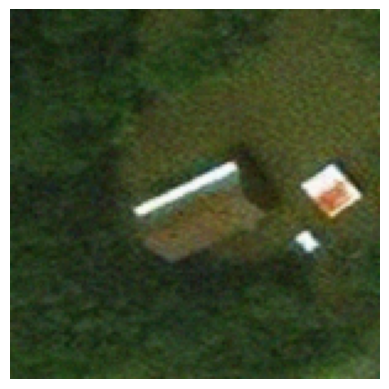

In [37]:
std_inv = 1 / (std + 1e-8)
unnormalize = T.Normalize(-mean * std_inv, std_inv)
def show_tensor_image(t):
    img = t.clamp(0,1).permute(1,2,0).cpu().numpy()
    plt.imshow(img)
    plt.axis("off")

show_tensor_image(unnormalize(images[0]))